In [1]:
import cryo_em_select as cryo
model = cryo.CryoEmNet(batch_size=2, image_size=(224,224,3))
model.train(learning_rate=0.1, epochs=1)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 8)  224         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 8)  32         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

1/1 [==============================] - 0s 73ms/step


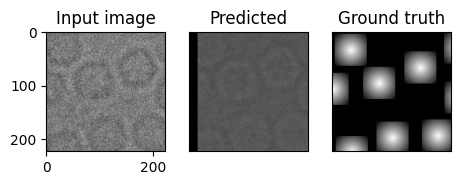

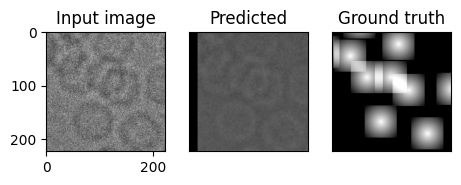

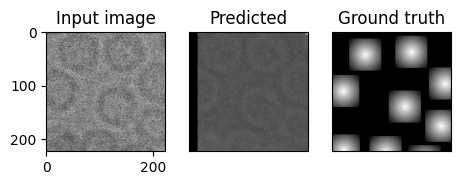

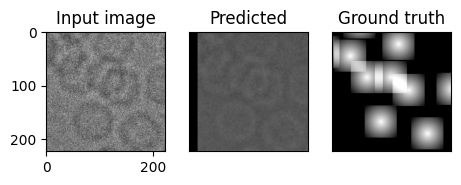

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

def plot_image_predictions(images, channels, model):
    path = str(os.getcwd()) + '/data_example/raw_data/May08_03.15.02.bin_avg.png'
    img = cv2.imread(os.path.join("",path))
    #print(img.shape)
    training_images_resize = []
    segmented_images_resize = []
    for i in range(224,1200,224):
        for j in range(224,1200,224):
            #print(img[i-224:i, j-224:j].shape)
            img_resize = img[i-224:i, j-224:j]
            img_resize = img_resize.astype(float)
            img_resize /= 255
            #print(img_resize.shape)
            #res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
            training_images_resize.append(img_resize)
    
    path = str(os.getcwd()) + '/data_example/label_data/May08_03.15.02.bin_avg.png-points.csv-gauss_img.jpg'
    img = cv2.imread(os.path.join("",path))
    for i in range(224,1200,224):
        for j in range(224,1200,224):
            img_resize = img[i-224:i, j-224:j]
            img_resize = img_resize.astype(float)
            img_resize /= 255
            #res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
            segmented_images_resize.append(img_resize)

    # Pick 4 random examples
    # for x in training_images_resize:
    #     print(x.shape)
    training_images_resize = np.stack(training_images_resize, axis=0)
    segmented_images_resize = np.stack(segmented_images_resize, axis=0)

    rand_ix = np.random.randint(0,25,images)
    #print(training_images_resize[rand_ix,:,:,:])
    out = model.predict(training_images_resize[rand_ix,:,:,:])
    #out[:,0:100,:,:] +=  0.5
    #print(out)
    ref = segmented_images_resize[rand_ix,:,:]

    for k in range(4):
        plt.figure(figsize=(20,4))
        plt.subplot(2,11,1)
        plt.imshow(training_images_resize[rand_ix[k],:,:,:])
        plt.title('Input image')
        plt.gray()

        for i in range(channels):
            ax = plt.subplot(2,11,2)
            plt.imshow(out[k,:,:,i],vmin=0,vmax=1)
            plt.title('Predicted')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax = plt.subplot(2,11,3)
            plt.imshow(ref[k,:,:],vmin=0,vmax=1)
            plt.title('Ground truth')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            plt.gray()
plot_image_predictions(4,1,model)